# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import time

# matplotlib and seaborn for visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':3}

# Counter for counting the number of data points in each clusters

from collections import Counter

# Necessary modules for Standardising the data and using ML algorithms
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.neighbors import NearestNeighbors


# silhouette_score for evaluating the clusters, ranges from -1 to +1, desirable score is close to 1

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.metrics.pairwise import euclidean_distances


# Pre Defined Function

In [ ]:
#This is the clustering and clusters plotting function
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time),
    fontsize=14)

# Task 1.a - Load data

In [ ]:
# data = np.load('/content/data.npy')
data = np.load('data.npy')

In [ ]:
data.shape

(400, 2)

In [ ]:
data[:10]

array([[ 0.84219027,  0.03995678],
       [ 0.57487825, -0.43018898],
       [-0.33429872,  0.85586816],
       [ 0.75188718,  0.56642066],
       [ 1.9682912 ,  0.45406949],
       [ 0.0943052 ,  1.03902341],
       [-0.85792872,  0.72692826],
       [-0.8777414 ,  0.2861317 ],
       [ 1.04007903,  0.45056114],
       [-0.72950773,  0.60590778]])

# Task 1.b - Scatter Plot

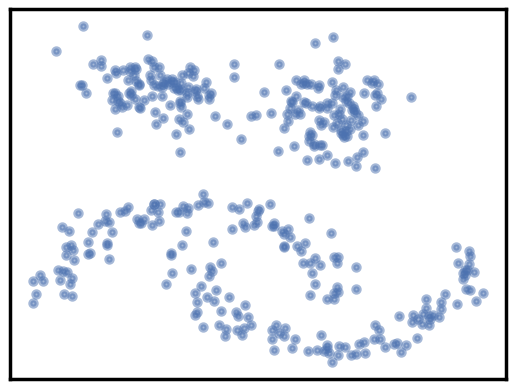

In [ ]:
plt.scatter(data.T[0],data.T[1],c = 'b',**plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Task 3

# Analysis for clustering

In [ ]:
df = pd.DataFrame(data)
df.head()

0         1
0  0.842190  0.039957
1  0.574878 -0.430189
2 -0.334299  0.855868
3  0.751887  0.566421
4  1.968291  0.454069

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

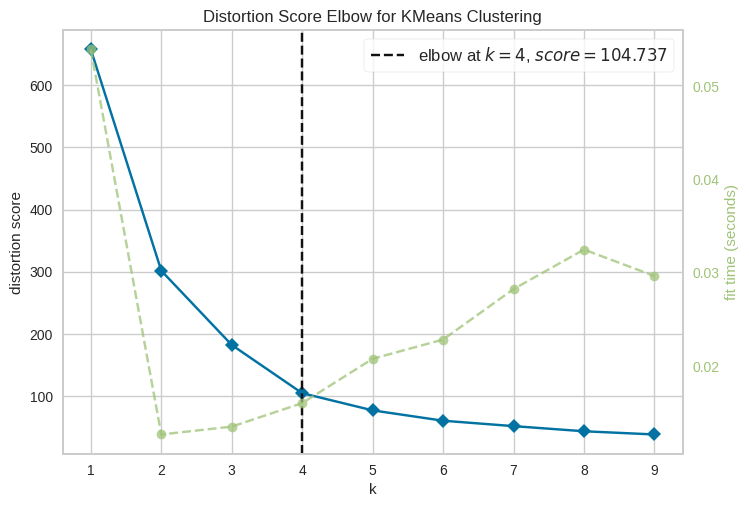

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure


# Ignore following Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

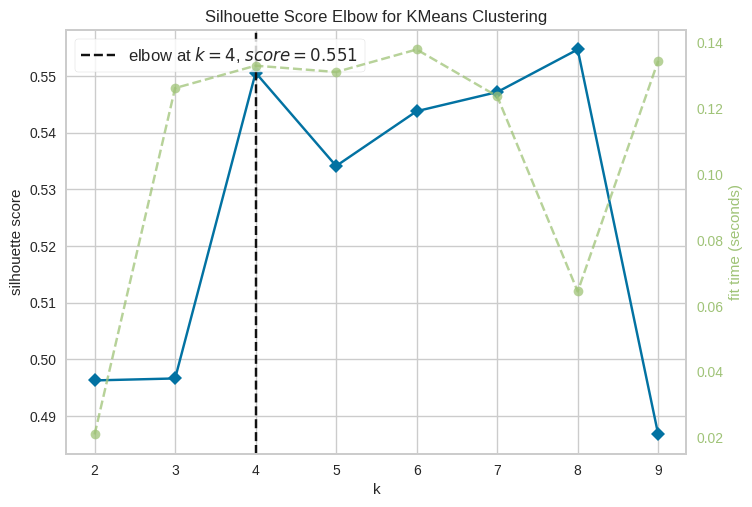

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

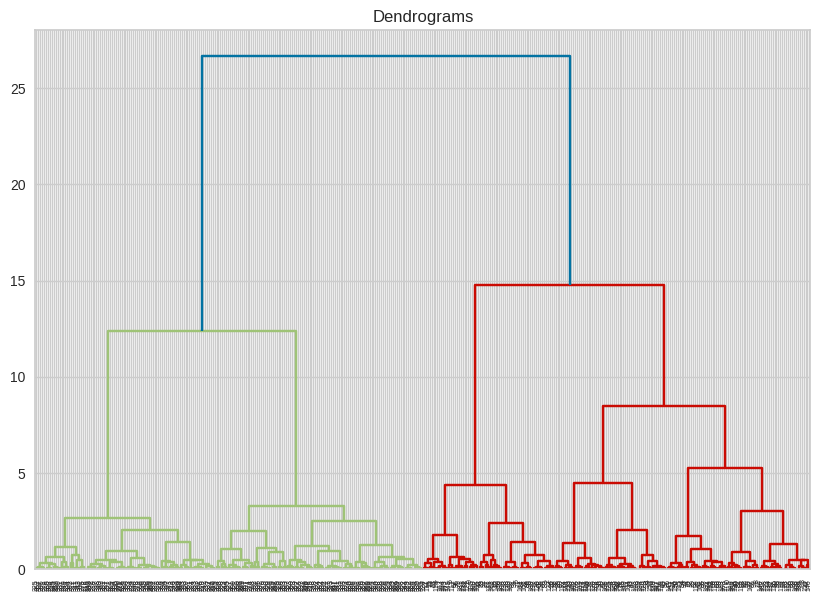

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

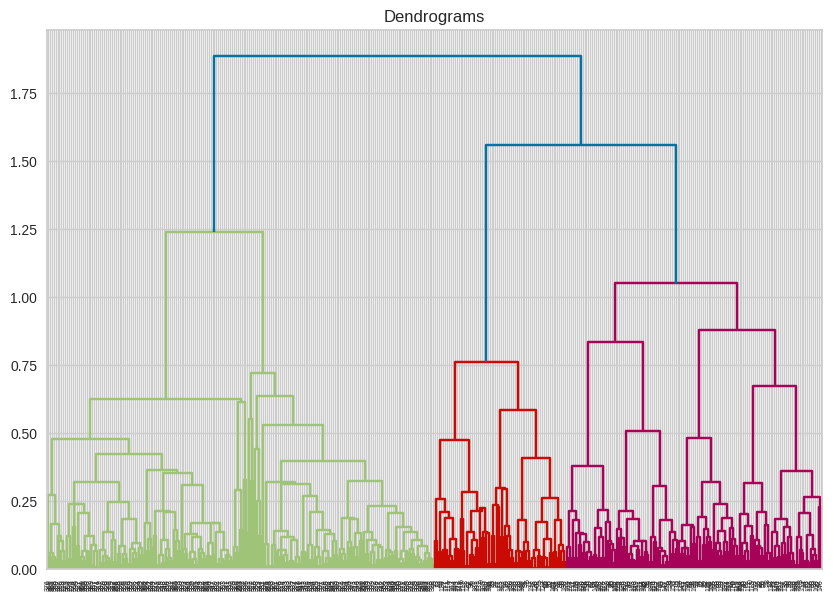

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='centroid'))

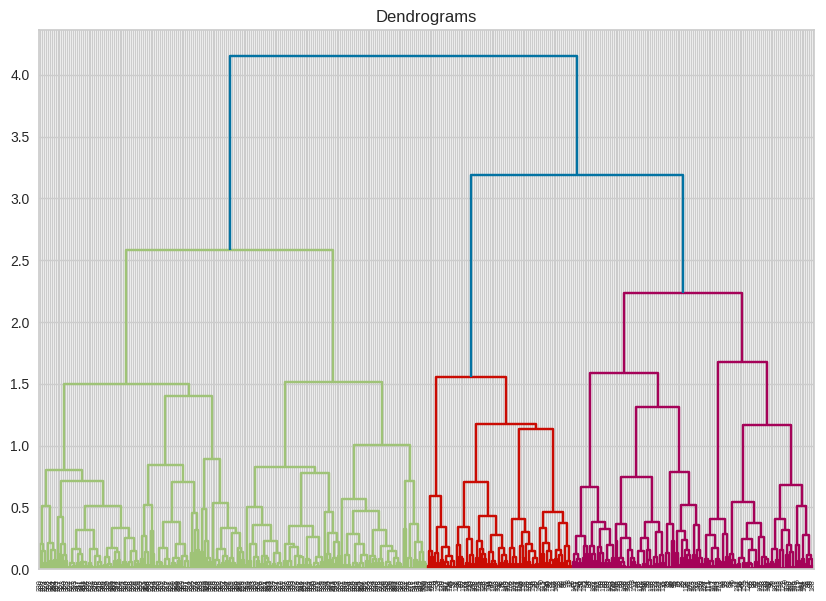

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-b174fc43df8e>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/clu

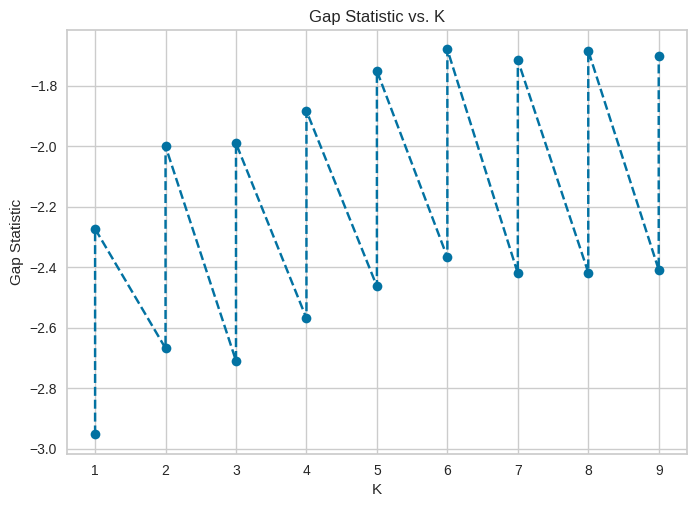

In [ ]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)

            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
            # Fit cluster to original data and create dispersion
            km = KMeans(k)
            km.fit(data)

            origDisp = km.inertia_
            all# Calculate gap statistic
            gap = np.log(np.mean(refDisps)) - np.log(origDisp)
            # Assign this loop's gap statistic to gaps
            gaps[gap_index] = gap

            resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(df, nrefs=2, maxClusters=10)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

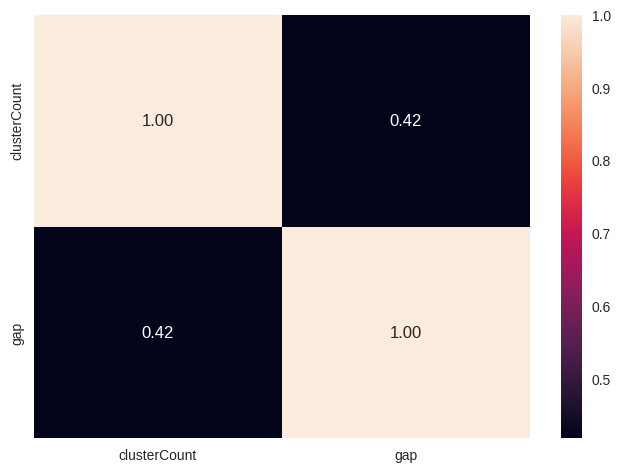

In [ ]:
tech_rets_corr= df.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

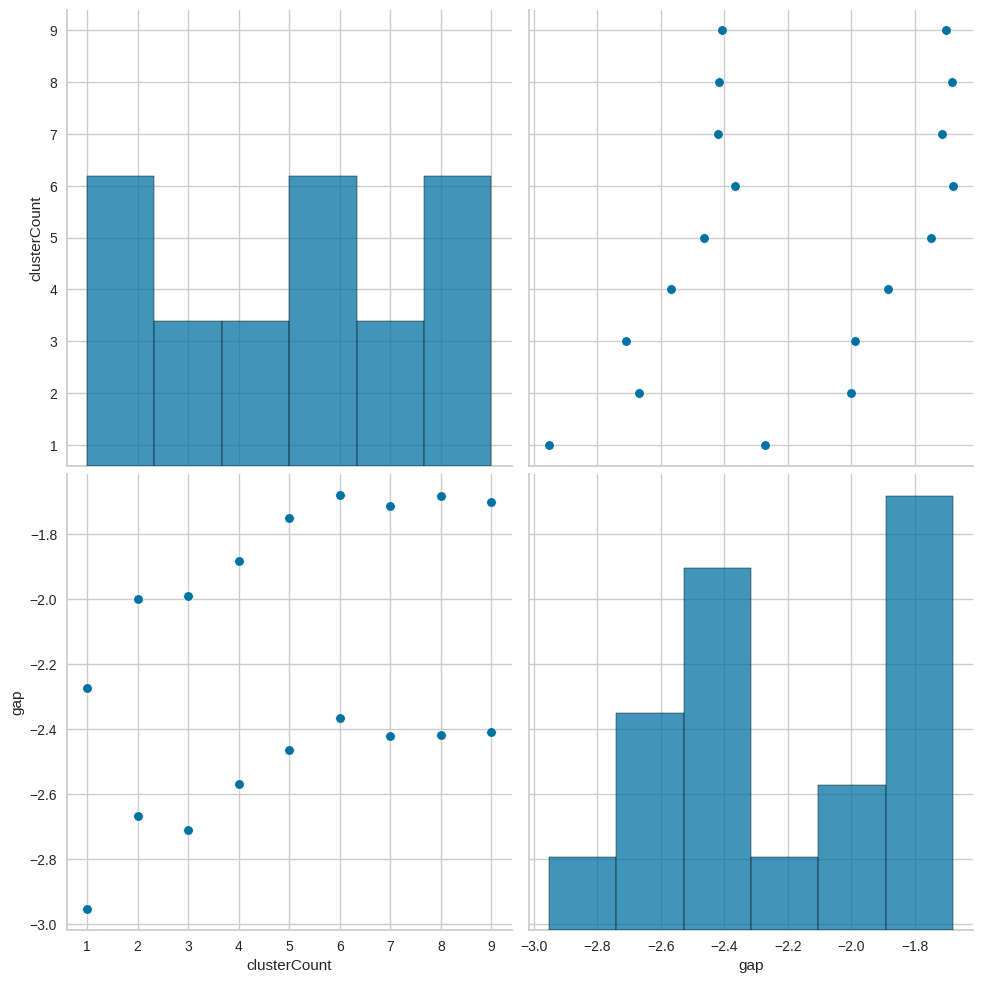

In [ ]:
sns.pairplot(df, height=5);

## -------------------------------------------------------------------------------------------------------------------------------
# 1. KMeans

## - partitioning a dataset into a set of distinct, non-overlapping cluster
## - iteratively refines the assignment of data points to clusters and updates the cluster centroids until convergence
## - K-Means assumes clusters of similar sizes and spherical shapes.

#### class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

## n_clusters -  4
### 4 as Observable cluster are 4 and with Elbow Method best cluster value is 4

## init - default (k-means++)
### k-means++ will be default - and centroids are chosen with a probability proportional to the square of the distance from the point to the nearest existing centroid where as in Random it will random centroids - slower convergence speed.

## n_init - deafult (auto)
### Auto run with different centroid seeds -  lowest inertia (sum of squared distances within clusters) among all the runs

## max_iter - default (300)
### aims to minimize the sum of squared distances within clusters (inertia). As it's not a complex data no use playaround with max_iter

## algorithm - default (lloyd)
###  classical EM-style algorithm is "lloyd", "auto" and "full" are deprecated both aliases for "lloyd".
### elkan - Faster uses upper & Lower bound with different cluster formation where as in lloyd it will be a constant but works with large dataset


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


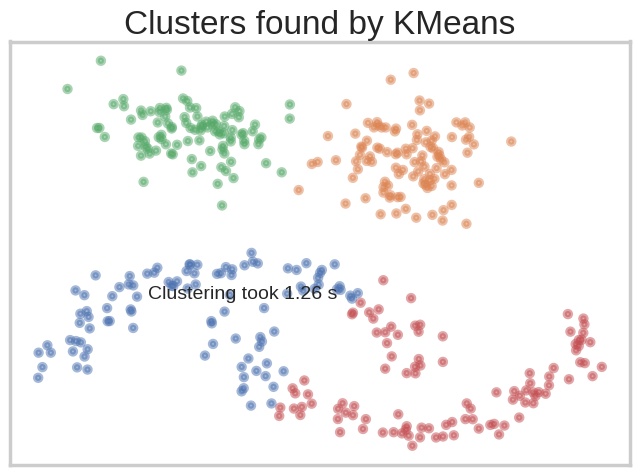

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4,'init':'random','algorithm':'elkan','max_iter':100})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


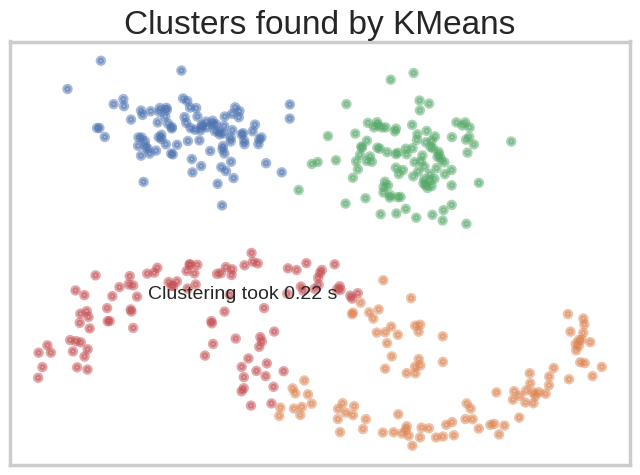

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4,'init':'k-means++','algorithm':'lloyd','max_iter':1000})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


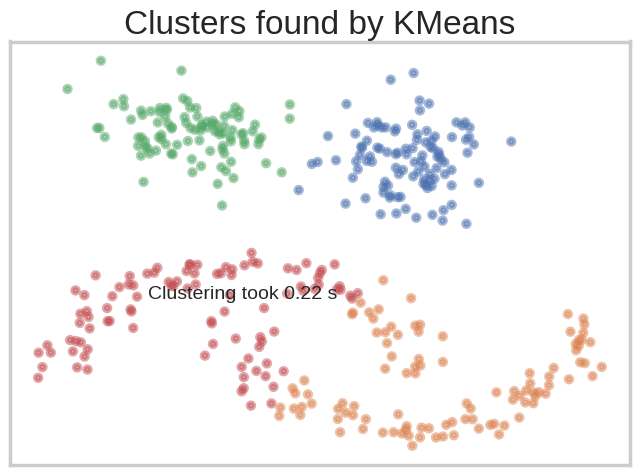

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4,'init':'k-means++','algorithm':'elkan','max_iter':100})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


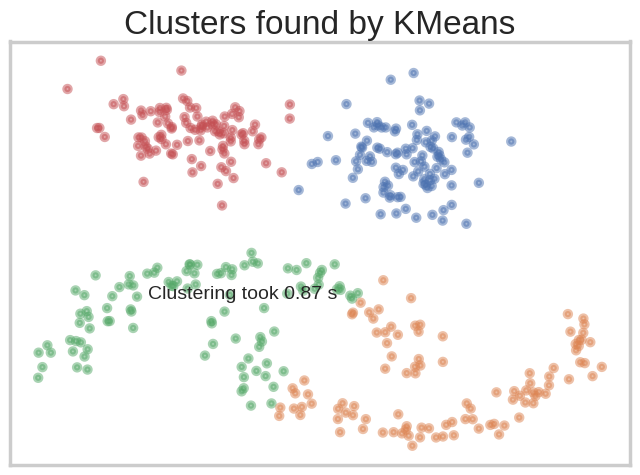

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4,'init':'k-means++','algorithm':'elkan','max_iter':1000})

In [ ]:
model = cluster.KMeans(n_clusters=4,init='k-means++',algorithm='elkan',max_iter=100)
model.fit(data)
score = silhouette_score(data, model.labels_)
print(score)

0.5505962600226745


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## References
### 1. https://www.ee.columbia.edu/~dpwe/papers/PhamDN05-kmeans.pdf
### 2. https://repository.uel.ac.uk/download/220f4dc9d24270657fdbb74424e6a89851484b52204ad09dc83598cb696a91a3/2390152/Novel%2520centroid%2520selection%2520approaches%2520for%2520KMeans-clustering%2520based%2520recommender%2520systems.pdf
### 3. https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=885a2077c92ebae06703936444945c11df27deba
### 4. https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf
### 5. https://www.ijert.org/research/analysis-and-study-of-k-means-clustering-algorithm-IJERTV2IS70648.pdf

## -------------------------------------------------------------------------------------------------------------------------------
# 2. Affinity Propagation

## - identifies representative data points within a dataset and assigns each data point to one of these exemplars - Euclidean distance, Preference Matrix, Message Passing
## - automatically determines the number of clusters

##### class sklearn.cluster.AffinityPropagation(*, damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False, random_state=None)

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

0         1
0  0.842190  0.039957
1  0.574878 -0.430189
2 -0.334299  0.855868
3  0.751887  0.566421
4  1.968291  0.454069

# Find the best Preference with Damping choosing values only where Number of cluster_centers_ = 4 which will help to get best parameter where good silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


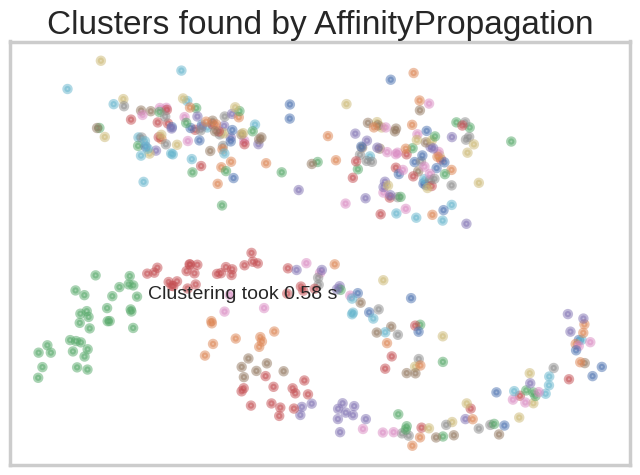

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-40,'damping':0.5})

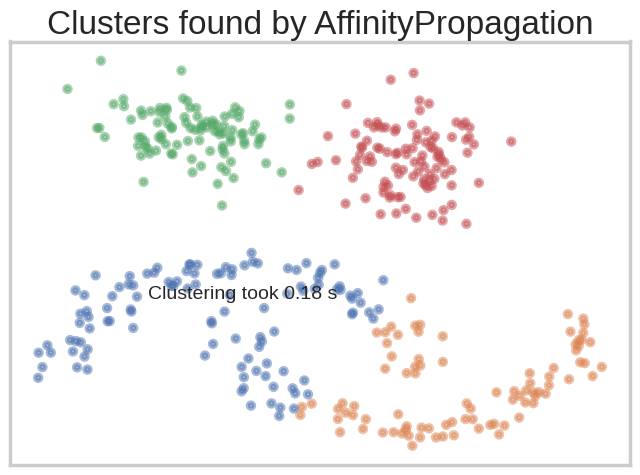

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-40,'damping':0.9})

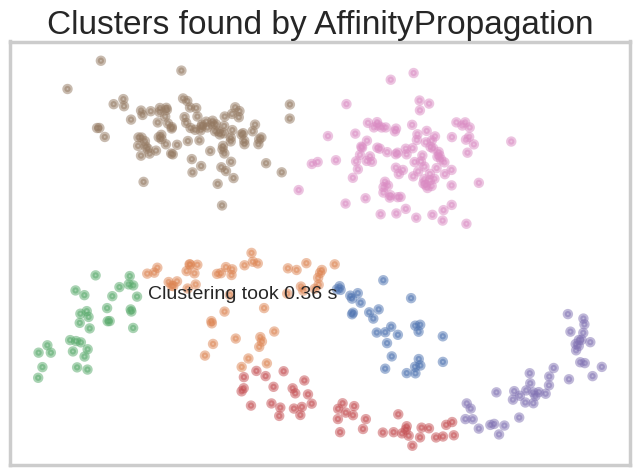

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-10,'damping':0.5})

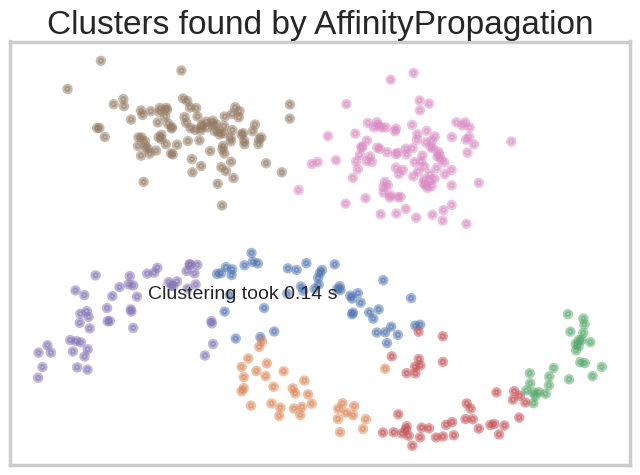

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-10,'damping':0.8})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


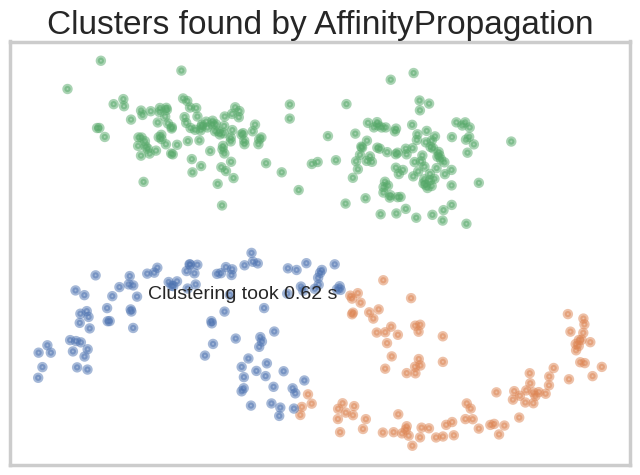

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-50,'damping':0.5})

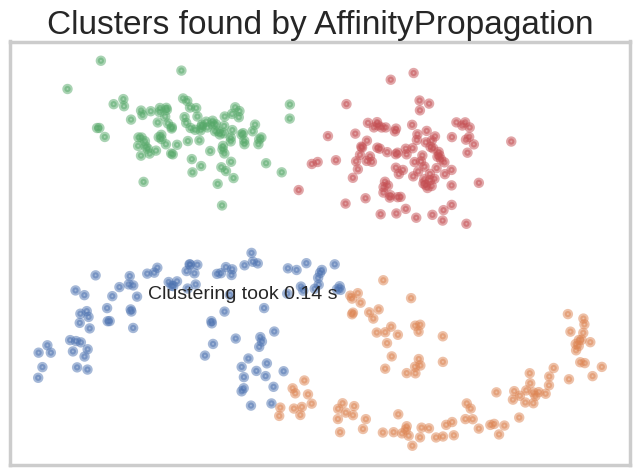

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-50,'damping':0.9})

In [ ]:
output = []
Preference = [-50, -40,-30,-20, -10, 0, 10]
damping = [0.5,0.6,0.7,0.8,0.9]
for pre in Preference:
    for dam in damping:
        model = cluster.AffinityPropagation(preference=pre,damping = dam ,random_state=42)
        model.fit(data)
        try:
            score = silhouette_score(data, model.labels_)
            print(score)

#             break
            if len(model.cluster_centers_) == 4:
                output.append((pre,dam, score))
            else:
                print(len(model.cluster_centers_))
        except:
            pass
Preference_val,damping_val, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"Preference: {Preference_val}")
print(f"Damping: {damping_val}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


0.1691587317977145
100
0.546969158902703
0.5428704231175563
0.5500750764681438
0.5500750764681438


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


0.3822276959594199
2
0.5425249186171915
0.5409221557830404
0.546969158902703
0.546969158902703


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


0.546969158902703
0.546969158902703
0.5289870761897396
5
0.5289870761897396
5
0.5289870761897396
5
0.5176958433750756
5
0.5416320939055992
6
0.5431317547545089
6
0.542970317912033
6
0.5432034271527079
6
0.5386774196250301
7
0.5519999817046342
8
0.5470469698554823
7
0.5385057012432194
7
0.5308316143424172
7
Best silhouette_score: 0.5500750764681438
Preference: -50
Damping: 0.9


# Damping - 0.9
### Iterative process to select value use for oscillations and can improve the stability of the algorithm

## convergence_iter - Default(15)
### iterations with no change in the number of estimated clusters that stops the convergence

## preference - (-50)
### Iterative select with silhouette_score and number of clusters are 4

## affinity -  default=’euclidean’
### ‘euclidean’ uses the negative squared euclidean distance between points.

## random_state - 42
### to get a constant result for the silhouette_score

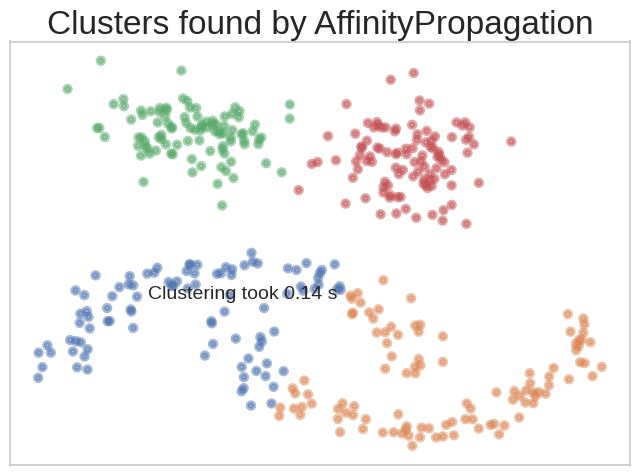

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-50,'damping':0.9})

## References

### 1.  https://utstat.toronto.edu/reid/sta414/frey-affinity.pdf
### 2.  https://www.geeksforgeeks.org/affinity-propagation/
### 3.  https://public.websites.umich.edu/~zhezhao/papers/AffinityPropagation.pdf

## -------------------------------------------------------------------------------------------------------------------------------
# 3. DBSCAN

## - Density-Based Spatial Clustering of Applications with Noise
## - Identify clusters in a dataset based on the density of data points in the feature space
## - Can discover clusters of arbitrary shape

## class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

### eps - Epsilon - Important Parameter - maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster

### min_samples -  Core Point or cluster - number of samples (or total weight) in a neighborhood for a point to be considered as a core point  min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse

### metric - default=’euclidean’
### algorithm - default=’auto’ - NearestNeighbors module to compute pointwise distances and find nearest neighbors
### p - default=None - If None, then p=2 (equivalent to the Euclidean distance)


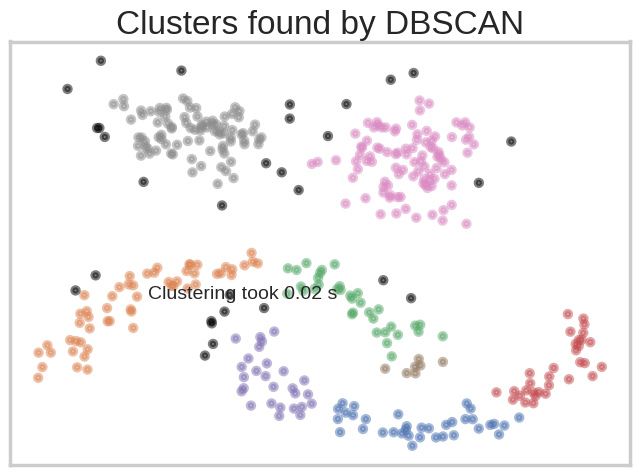

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.15, 'min_samples':4})

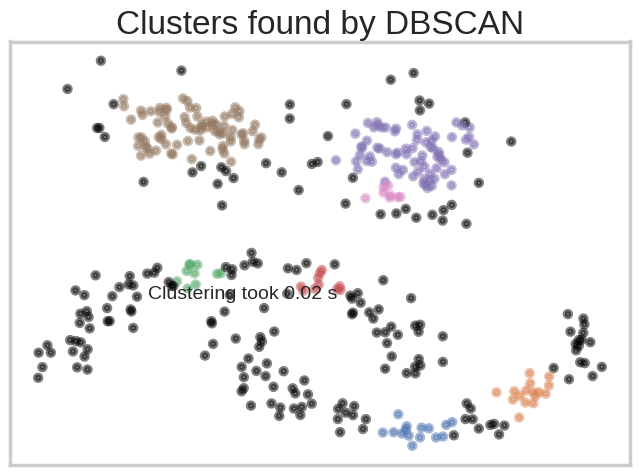

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.15, 'min_samples':10})

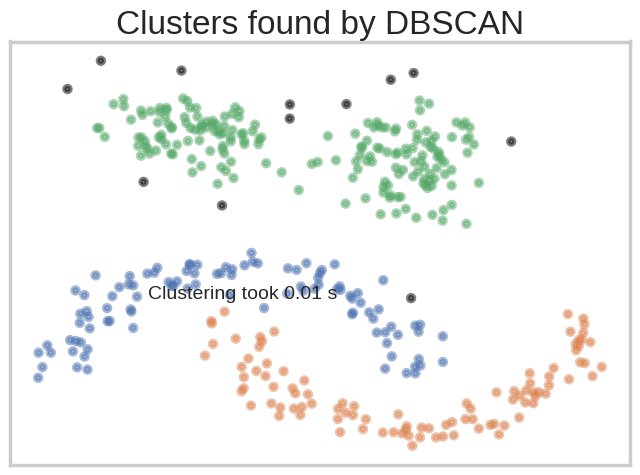

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.2, 'min_samples':4})

# Find the Epsilon value Range - DBSCAN use Euclidean with Nearest Neighbors

3


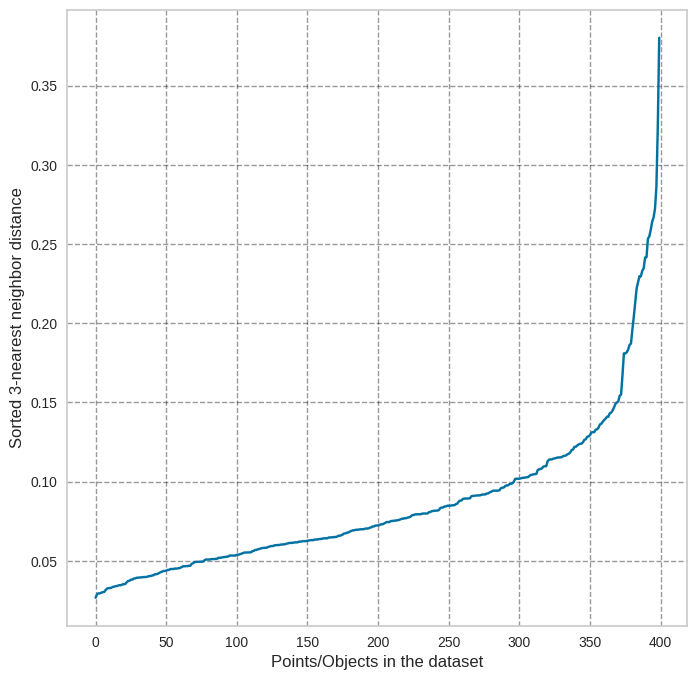

In [ ]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * data.shape[-1] - 1 # k=2*{dim(dataset)} - 1
print(k)
get_kdist_plot(X=data, k=k)

#  From Above Graph we can identify the range 0.10 to 0.25 samples have highest nearest neighbor

## Minimum Samples range lowest value range - 2 to 20 which help to find core points i.e clusters and to find our 4 observed cluster we will find the model labels greater than 3 and less than 5 i.e. 4 number of clusters with -1 label as noise considering = total 5 labels

In [ ]:
output = []
eps_range = np.arange(0.10,0.25, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01
min_samples_range = range(2,20)
for eps_val in eps_range:
    for min_samples_val in min_samples_range:
        model = cluster.DBSCAN(eps=eps_val,min_samples = min_samples_val)
        model.fit(data)
        try:
            score = silhouette_score(data, model.labels_)
#             print(score)
            if (len(set(model.labels_)))<6 and (len(set(model.labels_)))>3:

                output.append((eps_val,min_samples_val,score))
#             else:
#                 print(len(set(model.labels_)))
        except:
            pass
Epsilon_val,min_samples_val, score = sorted(output, key=lambda x:x[-1])[-1]
print("-"*100)
print(f"Best silhouette_score: {score}")
print(f"Epsilon_val: {Epsilon_val}")
print(f"min_samples_val: {min_samples_val}")

----------------------------------------------------------------------------------------------------
Best silhouette_score: 0.4501106264391794
Epsilon_val: 0.23999999999999994
min_samples_val: 10


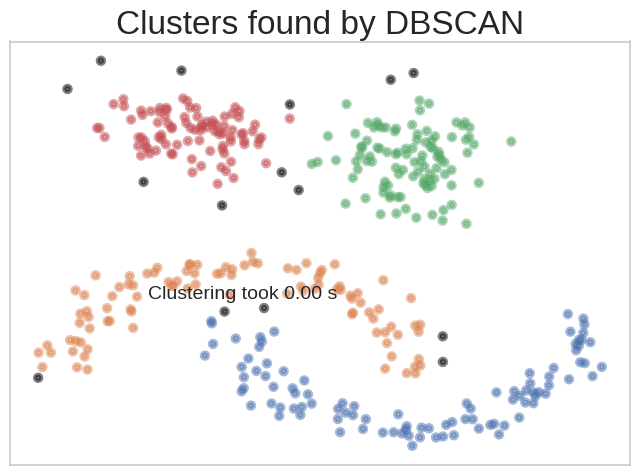

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':Epsilon_val, 'min_samples':min_samples_val})

In [ ]:
model = cluster.DBSCAN(eps=0.24,min_samples = 10)
model.fit(data)
score = silhouette_score(data, model.labels_)
print(score)

0.4501106264391794


In [ ]:
values, counts = np.unique(model.labels_, return_counts=True)
print(values)
print(counts)

[-1  0  1  2  3]
[ 15  98  97 100  90]


# References
## 1. https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
## 2. https://www.khoury.northeastern.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf
## 3. https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

## -------------------------------------------------------------------------------------------------------------------------------
# 4. BIRCH
## -  Balanced Iterative Reducing and Clustering using Hierarchies
## -  efficient in terms of memory usage and computational cost
## -  alternative to MiniBatchKMeans
## -  tree data structure with the cluster centroids being read off the leaf
## -  Metric & Building the CF tree and Global Clustering also called 2 step clustering

### class sklearn.cluster.Birch(*, threshold=0.5, branching_factor=50, n_clusters=3, compute_labels=True, copy=True)

### threshold - float, default=0.5
#### The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

### branching_factor - int, default=50
#### Maximum number of CF subclusters in each node. If a new samples enters such that the number of subclusters exceed the branching_factor then that node is split into two nodes with the subclusters redistributed in each. The parent subcluster of that node is removed and two new subclusters are added as parents of the 2 split nodes.

### n_clusters -  4
#### Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples

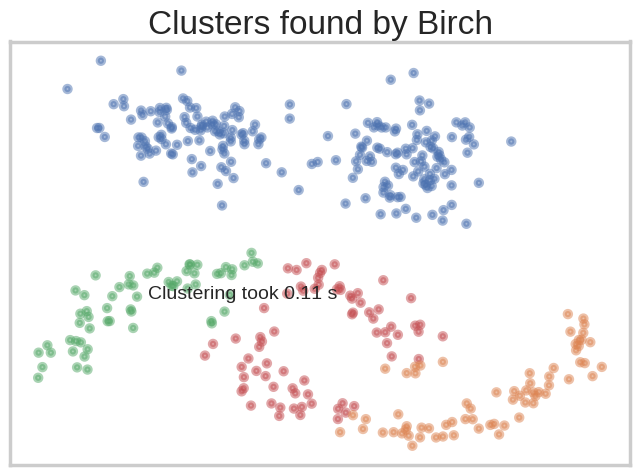

In [ ]:
plot_clusters(data, cluster.Birch, (), {'branching_factor' : 200,'threshold':0.5,'n_clusters':4})

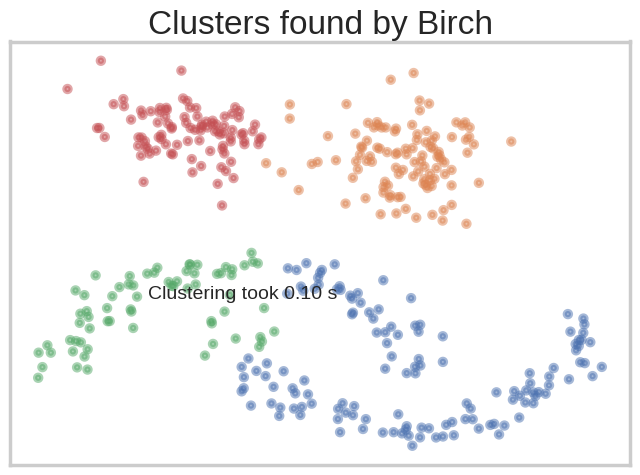

In [ ]:
plot_clusters(data, cluster.Birch, (), {'branching_factor' : 100,'threshold':0.1,'n_clusters':4})

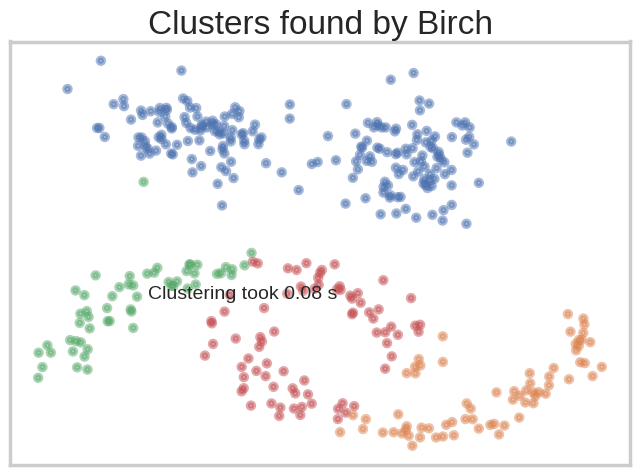

In [ ]:
plot_clusters(data, cluster.Birch, (), {'branching_factor' : 300,'threshold':0.8,'n_clusters':4})

In [ ]:
output = []
threshold_range = np.arange(0.1,1.1, 0.1) # returns array of ranging from 0.05 to 0.13 with step of 0.01
branching_factor_range = range(50,400,50)
for threshold_val in threshold_range:
    for branching_factor_val in branching_factor_range:
        model = cluster.Birch(threshold=threshold_val,branching_factor = branching_factor_val,n_clusters=4)
        model.fit(data)
        try:
            score = silhouette_score(data, model.labels_)
#             print(score)
            output.append((branching_factor_val,threshold_val,score))
#             else:
#                 print(len(set(model.labels_)))
        except:
            pass
branching_factor_val,threshold_val, score = sorted(output, key=lambda x:x[-1])[-1]
print("-"*100)
print(f"Best silhouette_score: {score}")
print(f"threshold_val: {threshold_val}")
print(f"branching_factor_val: {branching_factor_val}")

----------------------------------------------------------------------------------------------------
Best silhouette_score: 0.5483012380025292
threshold_val: 0.9
branching_factor_val: 350


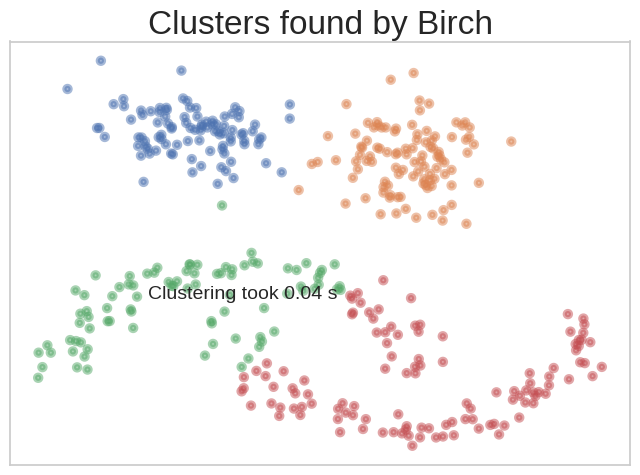

In [ ]:
plot_clusters(data, cluster.Birch, (), {'branching_factor' : branching_factor_val,'threshold':threshold_val,'n_clusters':4})

# References
### 1. https://medium.com/@noel.cs21/balanced-iterative-reducing-and-clustering-using-heirachies-birch-5680adffaa58
### 2. https://cdn2.hubspot.net/hubfs/55819/2018-PES-Portland-OR-USA-BIRCH_Clustering_SUBMIT%5B1%5D.pdf?t=1522697637650
### 3. https://sites.cs.ucsb.edu/~veronika/MAE/summary_BIRCH_zhang96.pdf
### 4. https://iopscience.iop.org/article/10.1088/1757-899X/725/1/012090/pdf

## -------------------------------------------------------------------------------------------------------------------------------
## 5. Optics ## - Ordering Points To Identify the Clustering Structure

## - finds core sample of high density and expands clusters from them
## - density-based clustering algorithm that extends the concepts of DBSCAN
## -  concept of "density reachability," which is an extension of the "reachability" concept in DBSCAN
## -  cluster hierarchy for a variable neighborhood radius.
## -  suited for usage on large datasets

#### class sklearn.cluster.OPTICS(*, min_samples=5, max_eps=inf, metric='minkowski', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, memory=None, n_jobs=None)

### min_samples int > 1 or float between 0 and 1, default=5
#### The number of samples in a neighborhood for a point to be considered as a core point. Also, up and down steep regions can’t have more than min_samples consecutive non-steep points. Expressed as an absolute number or a fraction of the number of samples (rounded to be at least 2).

### xi  float between 0 and 1, default=0.05
#### Determines the minimum steepness on the reachability plot that constitutes a cluster boundary. For example, an upwards point in the reachability plot is defined by the ratio from one point to its successor being at most 1-xi. Used only when cluster_method='xi'

### min_cluster_size  int > 1 or float between 0 and 1, default=None
#### Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples (rounded to be at least 2). If None, the value of min_samples is used instead. Used only when cluster_method='xi'

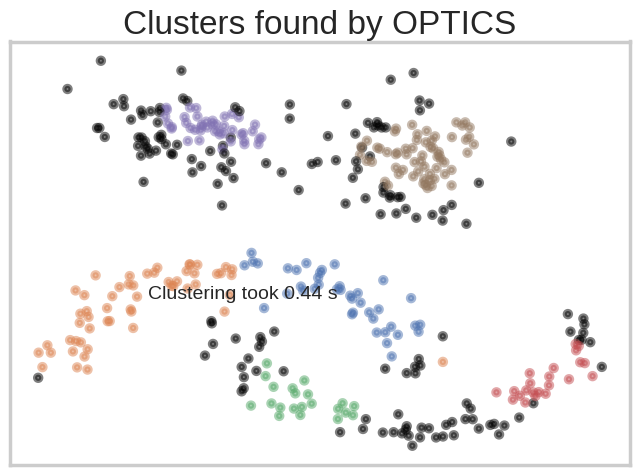

In [ ]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples':0.04, 'xi':0.05, 'min_cluster_size':0.04})

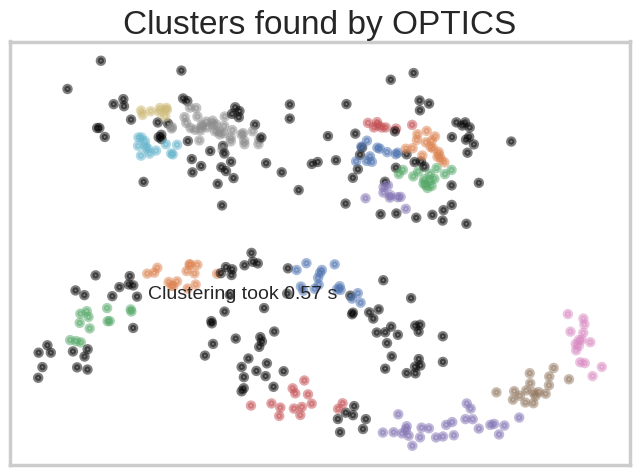

In [ ]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples':0.02, 'xi':0.02, 'min_cluster_size':0.02})

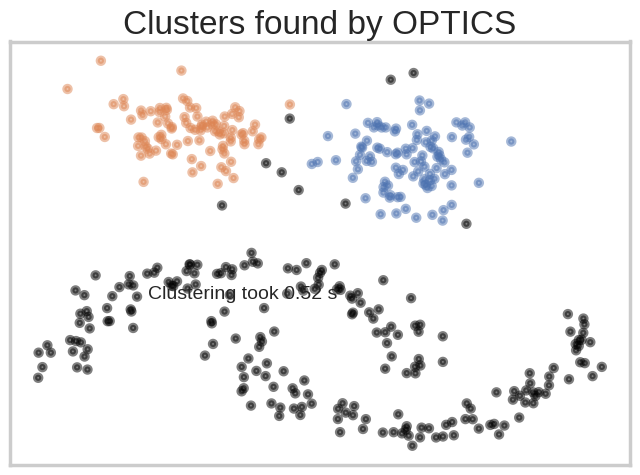

In [ ]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples':0.08, 'xi':0.08, 'min_cluster_size':0.08})

In [ ]:
output = []
min_samples_range = np.arange(0.1,1.1, 0.1) # returns array of ranging from 0.05 to 0.13 with step of 0.01
xi_range = np.arange(0.001,0.01,0.001)
min_cluster_size_range = np.arange(0.001,0.01,0.001)
for min_samples_val in min_samples_range:
    for xi_val in xi_range:
        for min_cluster_size_val in min_cluster_size_range:
            model = cluster.OPTICS(min_samples=min_samples_val,xi = xi_val,min_cluster_size=min_cluster_size_val)
            model.fit(data)
            try:
                score = silhouette_score(data, model.labels_)
                if (len(set(model.labels_)))<6 and (len(set(model.labels_)))>3:
                    output.append((min_samples_val,xi_val,min_cluster_size_val,score))
            except:
                pass
min_samples_val,xi_val, min_cluster_size_val, score = sorted(output, key=lambda x:x[-1])[-1]
print("-"*100)
print(f"Best silhouette_score: {score}")
print(f"min_samples_val: {min_samples_val}")
print(f"xi_val: {xi_val}")
print(f"min_cluster_size_val: {min_cluster_size_val}")

----------------------------------------------------------------------------------------------------
Best silhouette_score: 0.46252763106222383
min_samples_val: 0.1
xi_val: 0.009000000000000001
min_cluster_size_val: 0.009000000000000001


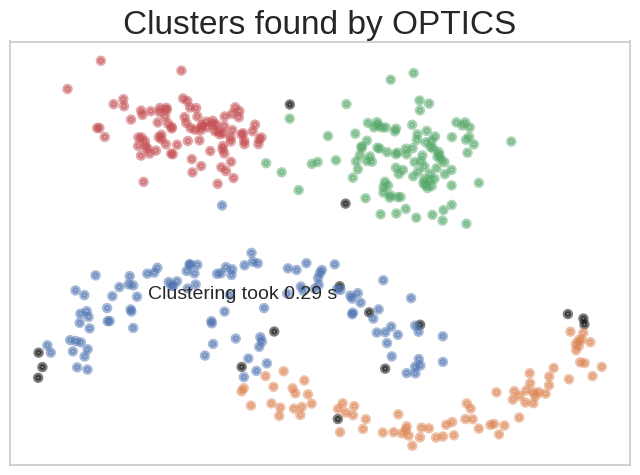

In [ ]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples':min_samples_val, 'xi':xi_val, 'min_cluster_size':min_cluster_size_val})

# References

### 1.  https://doublebyteblog.wordpress.com/2014/06/23/parametrizing-and-interpreting-opticsxi-clustering/
### 2.  https://www.researchgate.net/publication/221214752_OPTICS_Ordering_Points_to_Identify_the_Clustering_Structure
### 3. https://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf
### 4. https://dl.acm.org/doi/pdf/10.1145/304181.304187


## -------------------------------------------------------------------------------------------------------------------------------
# 6. HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications with Noise.
## -  DBSCAN over varying epsilon values and integrates the result to find a clustering that gives the best stability over epsilon
## - HDBSCAN to find clusters of varying densities


### class sklearn.cluster.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.0, max_cluster_size=None, metric='euclidean', metric_params=None, alpha=1.0, algorithm='auto', leaf_size=40, n_jobs=None, cluster_selection_method='eom', allow_single_cluster=False, store_centers=None, copy=False)




In [ ]:
!pip install hdbscan
# conda install -c conda-forge hdbscan
# !pip install --upgrade pip
# !pip install HDBSCAN
# !pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039284 sha256=cf9ba694f37d8dfdcb9ae1ce4ef40f144c4ddd1de05703a2846f2e27c7fd9266
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


In [ ]:
import hdbscan
# from sklearn.cluster import HDBSCAN

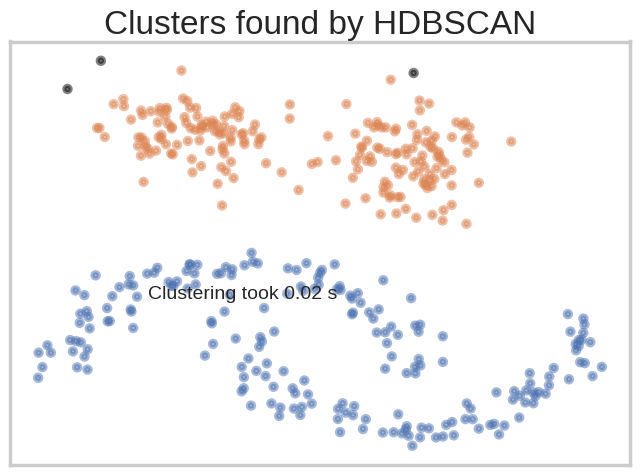

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.5,'min_samples':10})

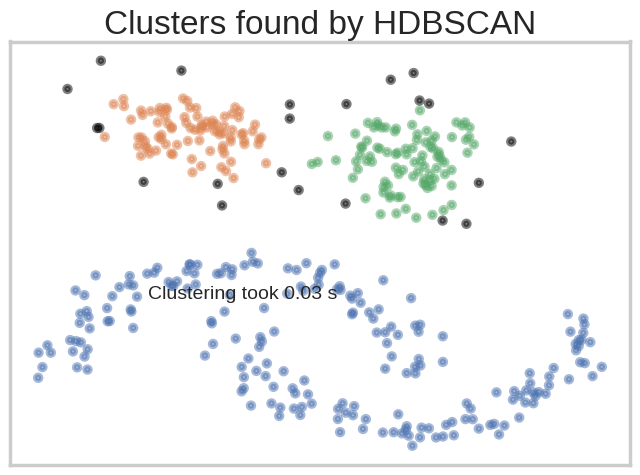

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.1,'min_samples':10})

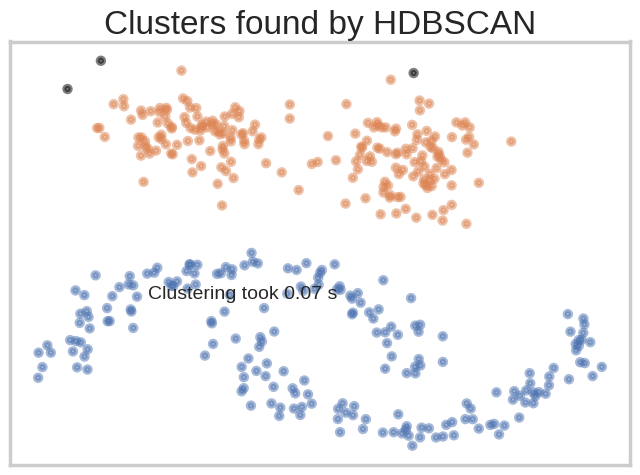

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.9,'min_samples':10})

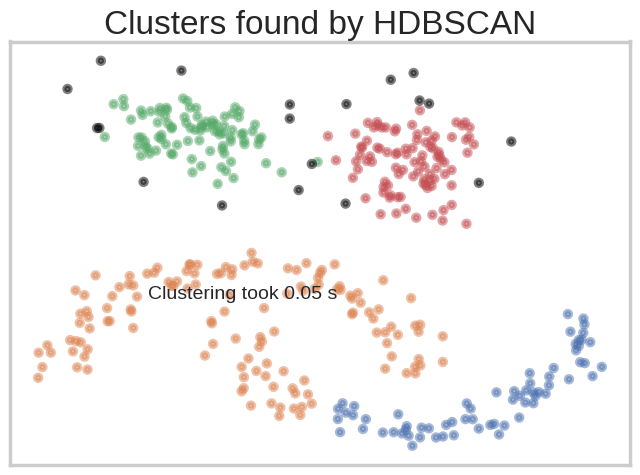

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.2,'min_samples':4})

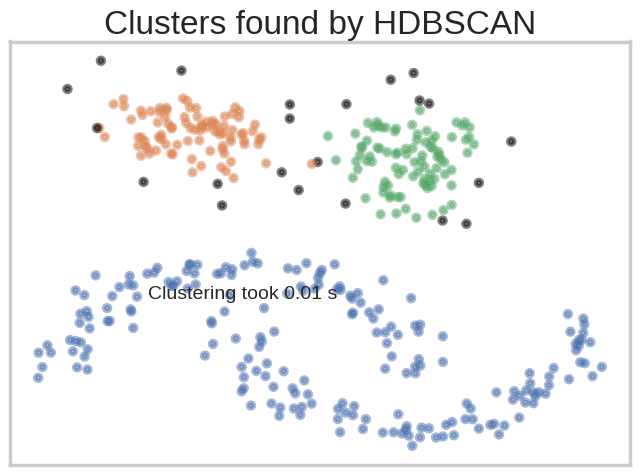

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.2,'min_samples':9})

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(data)

<Axes: ylabel='$\\lambda$ value'>

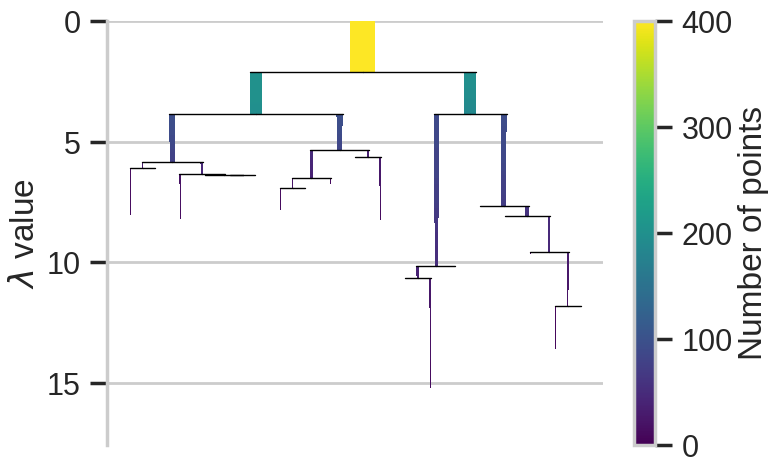

In [ ]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

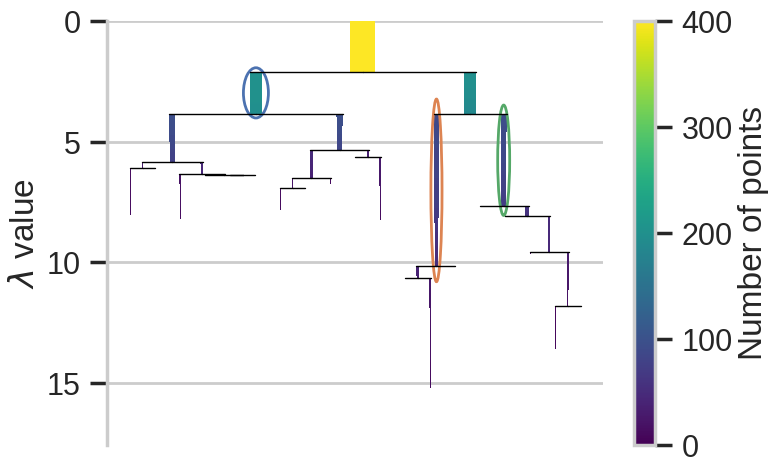

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 4))

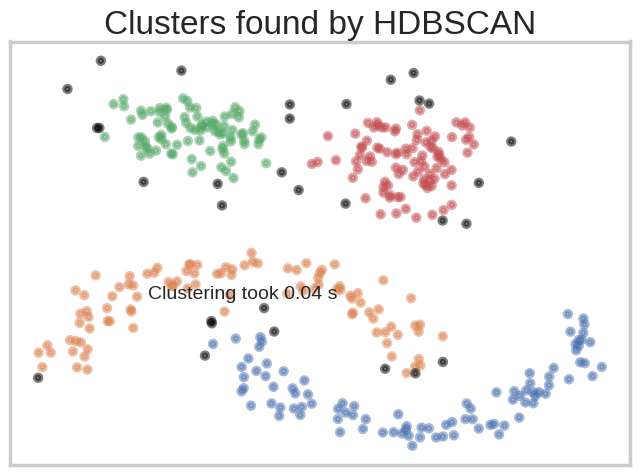

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.1,'min_samples':8})

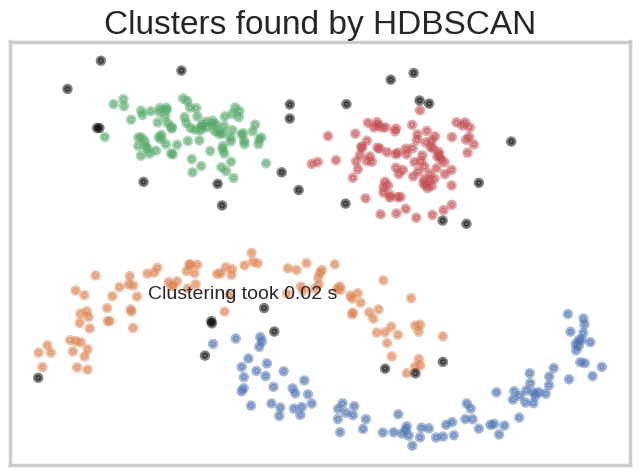

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5,'cluster_selection_epsilon':0.2,'min_samples':8})

In [ ]:
model = hdbscan.HDBSCAN(min_cluster_size = 5,cluster_selection_epsilon = 0.2,min_samples = 8)
model.fit(data)
score = silhouette_score(data, model.labels_)
print(score)

0.42625149316565375


In [ ]:
values, counts = np.unique(model.labels_, return_counts=True)
print(values)
print(counts)

[-1  0  1  2  3]
[31 94 97 86 92]


# References

### 1.  https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
### 2. https://e-archivo.uc3m.es/bitstream/handle/10016/33547/tesis_eduardo_pla_sacristan_2021.pdf?sequence=1
### 3. https://www.bioconductor.org/packages/release/bioc/manuals/optimalFlow/man/optimalFlow.pdf
### 4. https://arxiv.org/pdf/2209.12959.pdf


# 7. Agglomerative Clustering
## - Recursively merges pair of clusters of sample data; uses linkage distance
## - hierarchical clustering algorithm that builds a tree-like hierarchy of clusters
## - bottom-up approach
## - Sensitive to noise and outliers.
## - No need to specify the number of clusters in advance.

### sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

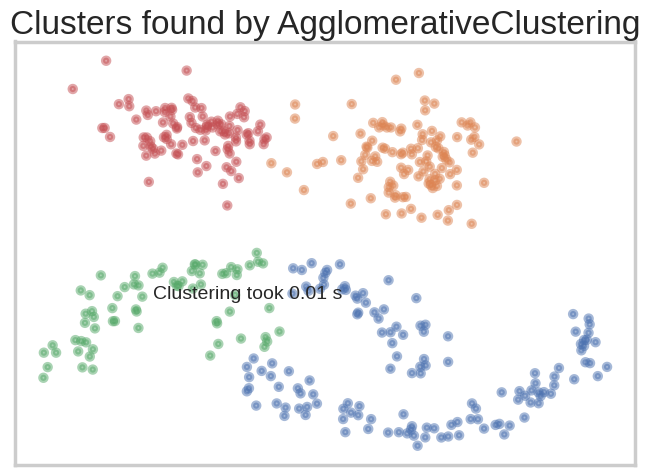

In [ ]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters': 4, 'linkage':'ward'})

In [ ]:
model = cluster.AgglomerativeClustering(n_clusters= 4, linkage ='ward')
model.fit(data)
score = silhouette_score(data, model.labels_)
print(score)

0.5332496224454546


# References
### 1. https://pure.manchester.ac.uk/ws/portalfiles/portal/195470491/Application_of_Agglomerative_Hierarchical_Clustering_Algorithm_for_Clustering_of_Time_Series_Data_Pure.pdf
### 2. https://www.ijsrp.org/research-paper-0313/ijsrp-p1515.pdf

# 8. Spectral Clustering

## -

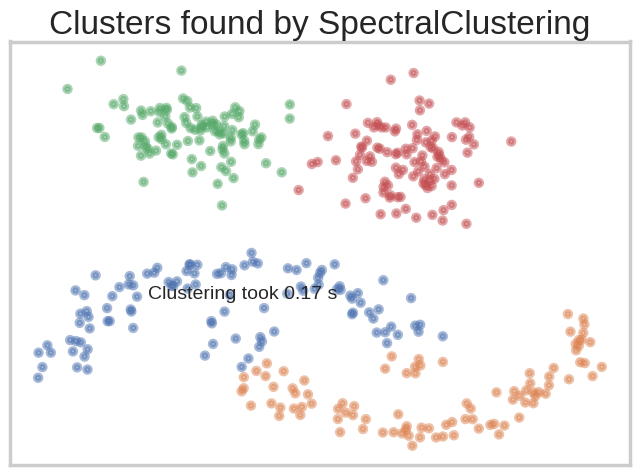

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4,'affinity':'rbf','gamma':10})

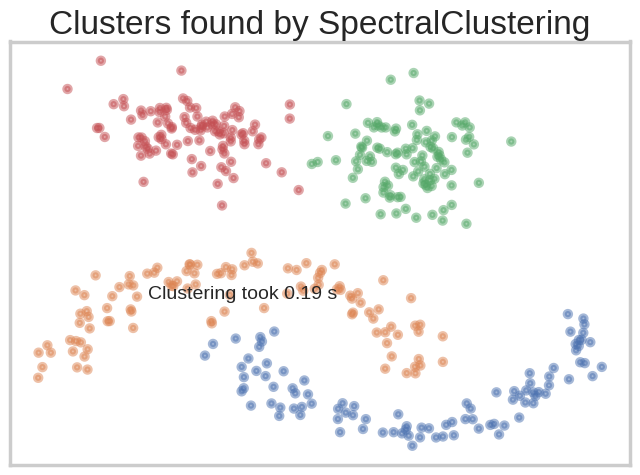

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4,'affinity':'rbf','gamma':80})

In [ ]:
algos = ['rbf','nearest_neighbors']
gammas_range = [60]
output = []

for algos_val in algos:
    for gammas_val in gammas_range:
        model = cluster.SpectralClustering(n_clusters =  4, affinity = algos_val)

        try:
            model.fit(data)
            score = silhouette_score(data, model.labels_)
#             print(score)
            output.append((algos_val,gammas_val,score))
#             else:
#                 print(len(set(model.labels_)))
        except:
            pass
algos_val,gammas_val, score = sorted(output, key=lambda x:x[-1])[-1]
print("-"*100)
print(f"Best silhouette_score: {score}")
print(f"algos_val: {algos_val}")
print(f"gammas_val: {gammas_val}")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


----------------------------------------------------------------------------------------------------
Best silhouette_score: 0.542782684754042
algos_val: rbf
gammas_val: 60


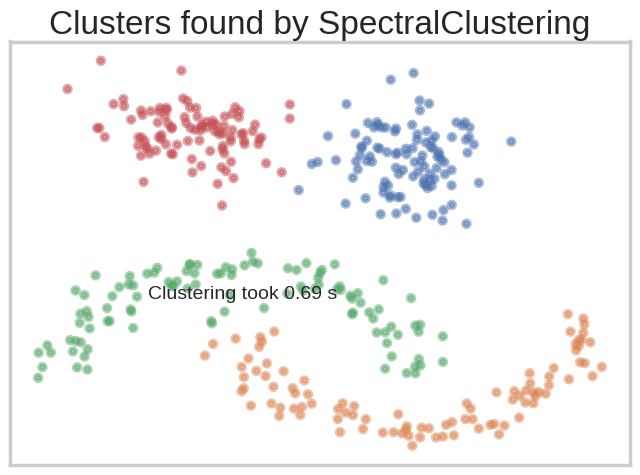

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4,'affinity':'rbf','gamma':60})